In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('data_tokenized_2609_doctr_trad V2.txt', sep = '\t')

In [2]:
df.head()

,filename,type,size,width,height,mots_doctr,nb_mots,mots_concat,Langue,mots_doctr_trad
0,img_0000000.jpg,facture,59453,750,1061,"['factur', 'logo', 'joanner', 'binet', 'couber...",55,factur logo joanner binet coubertin pari factu...,fr,"['bill', 'logo', 'joanner', 'binet', 'couberti..."
1,img_0000001.jpg,facture,55157,750,1061,"['joanner', 'binet', 'coubertin', 'pari', 'fac...",53,joanner binet coubertin pari factur facturé ce...,fr,"['joanner', 'binet', 'coubertine', 'bet', 'bil..."
2,img_0000002.jpg,facture,32097,726,1024,"['factur', 'entreprise', 'nom', 'société', 'ad...",28,factur entreprise nom société adresse postal a...,fr,"['bill', 'enterprise', 'name', 'company', 'Add..."
3,img_0000003.jpg,facture,63937,750,1061,"['joanner', 'binet', 'coubertin', 'pari', 'fac...",53,joanner binet coubertin pari factur cendrillon...,fr,"['joanner', 'binet', 'coubertine', 'bet', 'bil..."
4,img_0000004.jpg,facture,79474,773,771,"['payer', 'ligne', 'factur', 'sfideli', 'date'...",63,payer ligne factur sfideli date création date ...,fr,"['pay', 'line', 'bill', 'sfideli', 'date', 'es..."


In [3]:
df.shape

(1134, 10)

In [4]:
import re
r2 = re.compile(r"[^a-zA-Zéèàùôâêëäïöü]")
for i in range(df.shape[0]):
    df['mots_doctr_trad'][i] = r2.sub(' ', str(df['mots_doctr_trad'][i]))
    df['mots_doctr_trad'][i] = df['mots_doctr_trad'][i].replace("   ", " ").replace("  ", " ").lower()

C:\Users\alexj\AppData\Local\Temp\ipykernel_17968\1114243190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mots_doctr_trad'][i] = r2.sub(' ', str(df['mots_doctr_trad'][i]))
C:\Users\alexj\AppData\Local\Temp\ipykernel_17968\1114243190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mots_doctr_trad'][i] = df['mots_doctr_trad'][i].replace("   ", " ").replace("  ", " ").lower()


In [5]:
df.head()
df['mots_concat'][0]

'factur logo joanner binet coubertin pari factur cendrillon ayot rue nation pari envoye cendrillon ayot rue ferréol lle france factur date commande ance prix unit total tva total montant designation grand brun escargot manger petit marinière uniforme bleu facile jouer accordéon buncht condition modalit paiemer paiemer jour caisse epargne iban swift bic abcdfrp xxx merci '

In [6]:
df['mots_doctr_trad'][0]

' bill logo joanner binet coubertine bet bill butterfly ayot street nation bet send butterfly ayot street ferreol it s all right  france bill date command benance prices unit total tva total amount designation large brown snail eat small marine uniform blue easy play accordion buncht condition modality paying paying day body saving iban swift bic abcdfrp xxx thank you '

On supprime les colonnes qui ne seront pas utiles dans cette analyse.

In [7]:
df = df.drop(['mots_doctr', 'nb_mots', 'Langue'], axis = 1)

In [8]:
df.head()

,filename,type,size,width,height,mots_concat,mots_doctr_trad
0,img_0000000.jpg,facture,59453,750,1061,factur logo joanner binet coubertin pari factu...,bill logo joanner binet coubertine bet bill b...
1,img_0000001.jpg,facture,55157,750,1061,joanner binet coubertin pari factur facturé ce...,joanner binet coubertine bet bill billed butt...
2,img_0000002.jpg,facture,32097,726,1024,factur entreprise nom société adresse postal a...,bill enterprise name company address postal a...
3,img_0000003.jpg,facture,63937,750,1061,joanner binet coubertin pari factur cendrillon...,joanner binet coubertine bet bill butterfly a...
4,img_0000004.jpg,facture,79474,773,771,payer ligne factur sfideli date création date ...,pay line bill sfideli date establishment date...


On recréé une colonne mots_concat à partir de la traduction.

Enfin, en se basant sur l'interprétation des résultats de l'itération précédente, on va rassembler les catégories "rrc.cvc", "scientific_publication" et "scientific_report", très similaires et difficiles à dissocier.

In [9]:
df['type'] = df['type'].replace(['rrc.cvc', 'scientific_publication', 'scientific_report'], ['scientific_doc', 'scientific_doc', 'scientific_doc'])

In [10]:
df['type'].value_counts()

scientific_doc     351
paye               145
id_pieces           82
carte postale       70
facture             66
passeport           43
handwritten         35
news_article        32
memo                31
questionnaire       31
resume              30
letter              29
budget              25
presentation        25
specification       24
invoice             24
advertisement       23
justif_domicile     23
email               23
form                22
Name: type, dtype: int64

## Première itération avec un Sentiment analysis

On cherche dans un premier temps à identifier si l'image est un CV (1), ou non (0).

In [11]:
dftype = df['type']
df2 = pd.get_dummies(df, columns = ['type'])
df = pd.concat([dftype, df2], axis = 1)



In [12]:
df.head()

,type,filename,size,width,height,mots_concat,mots_doctr_trad,type_advertisement,type_budget,type_carte postale,...,type_letter,type_memo,type_news_article,type_passeport,type_paye,type_presentation,type_questionnaire,type_resume,type_scientific_doc,type_specification
0,facture,img_0000000.jpg,59453,750,1061,factur logo joanner binet coubertin pari factu...,bill logo joanner binet coubertine bet bill b...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,facture,img_0000001.jpg,55157,750,1061,joanner binet coubertin pari factur facturé ce...,joanner binet coubertine bet bill billed butt...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,facture,img_0000002.jpg,32097,726,1024,factur entreprise nom société adresse postal a...,bill enterprise name company address postal a...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,facture,img_0000003.jpg,63937,750,1061,joanner binet coubertin pari factur cendrillon...,joanner binet coubertine bet bill butterfly a...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,facture,img_0000004.jpg,79474,773,771,payer ligne factur sfideli date création date ...,pay line bill sfideli date establishment date...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df = df.fillna(' ')
df.isna().any().sum()

0

In [14]:
df.head()

,type,filename,size,width,height,mots_concat,mots_doctr_trad,type_advertisement,type_budget,type_carte postale,...,type_letter,type_memo,type_news_article,type_passeport,type_paye,type_presentation,type_questionnaire,type_resume,type_scientific_doc,type_specification
0,facture,img_0000000.jpg,59453,750,1061,factur logo joanner binet coubertin pari factu...,bill logo joanner binet coubertine bet bill b...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,facture,img_0000001.jpg,55157,750,1061,joanner binet coubertin pari factur facturé ce...,joanner binet coubertine bet bill billed butt...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,facture,img_0000002.jpg,32097,726,1024,factur entreprise nom société adresse postal a...,bill enterprise name company address postal a...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,facture,img_0000003.jpg,63937,750,1061,joanner binet coubertin pari factur cendrillon...,joanner binet coubertine bet bill butterfly a...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,facture,img_0000004.jpg,79474,773,771,payer ligne factur sfideli date création date ...,pay line bill sfideli date establishment date...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On divise notre jeu de données en un ensemble d'entraînement et un ensemble de test

In [15]:
from sklearn.model_selection import train_test_split
X = df['mots_doctr_trad']
y = df['type_scientific_doc']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

On utilise le Gradient Boosting Tree, en utilisant un objet vectorisateur calibré pour considérer également les groupes de 2 et 3 mots, dans la limite des 500 mots/groups de mots les plus fréquents. 

Le modèle tourne vite, donc on se permet d'augmenter le nombre d'estimateurs du Gradient Boosting afin d'améliorer les résultats.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

vectorizer = CountVectorizer(ngram_range = (1,3), max_features = 500)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

In [17]:
clf = GradientBoostingClassifier(n_estimators = 2000, random_state = 0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = ['autre', 'scientific_doc']))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Classe réelle'], colnames = ['Classe prédite']).rename(columns={0: "autre",1: "scientific_doc"}).rename(index={0: "autre", 1: "scientific_doc"})
confusion_matrix

                precision    recall  f1-score   support

         autre       0.91      0.92      0.92       160
scientific_doc       0.80      0.79      0.80        67

      accuracy                           0.88       227
     macro avg       0.86      0.85      0.86       227
  weighted avg       0.88      0.88      0.88       227



Classe prédite,autre,scientific_doc
Classe réelle,,
autre,147,13
scientific_doc,14,53


On voit que le taux de recall de la classe 1 est assez médiocre. Une explication plausible est le déséquilibre de notre dataset : on cherche à reconnaitre 49 CV au milieu de 322 documents.
On va ajouter un RandomOverSampler pour équilibrer ce dataset.

In [19]:
# !pip install imblearn

In [20]:
from imblearn import over_sampling

In [21]:
ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)
clf.fit(X_ro, y_ro)
y_pred_ro = clf.predict(X_test)

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [22]:
print(classification_report(y_test, y_pred_ro, target_names = ['autre', 'scientific_doc']))

confusion_matrix = pd.crosstab(y_test, y_pred_ro, rownames = ['Classe réelle'], colnames = ['Classe prédite']).rename(columns={0: "autre",1: "scientific_doc"}).rename(index={0: "autre", 1: "scientific_doc"})
confusion_matrix

                precision    recall  f1-score   support

         autre       0.92      0.92      0.92       160
scientific_doc       0.81      0.81      0.81        67

      accuracy                           0.89       227
     macro avg       0.86      0.86      0.86       227
  weighted avg       0.89      0.89      0.89       227



Classe prédite,autre,scientific_doc
Classe réelle,,
autre,147,13
scientific_doc,13,54


Les résultats sont légèrement meilleurs, mais restent largement perfectibles.

On effectue la même démarche mais pour détecter le type facture.

In [23]:
X = df.mots_doctr_trad
y = df['type_facture']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

vectorizer = CountVectorizer(ngram_range = (1,3), max_features = 500)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

In [25]:
clf = GradientBoostingClassifier(n_estimators = 2000, random_state = 0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = ['autre', 'facture']))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Classe réelle'], colnames = ['Classe prédite']).rename(columns={0: "autre",1: "facture"}).rename(index={0: "autre", 1: "facture"})
confusion_matrix

              precision    recall  f1-score   support

       autre       0.99      1.00      0.99       213
     facture       1.00      0.79      0.88        14

    accuracy                           0.99       227
   macro avg       0.99      0.89      0.94       227
weighted avg       0.99      0.99      0.99       227



Classe prédite,autre,facture
Classe réelle,,
autre,213,0
facture,3,11


On observe de bons résultats, encore meilleurs qu'avec le type CV. Il semble que les factures soient plus faciles à reconnaître.
Idem, on va utiliser un RandomOverSampling pour essayer d'optimiser encore ces résultats.

In [27]:
ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)
clf.fit(X_ro, y_ro)
y_pred_ro = clf.predict(X_test)
print(classification_report(y_test, y_pred_ro, target_names = ['autre', 'facture']))

confusion_matrix = pd.crosstab(y_test, y_pred_ro, rownames = ['Classe réelle'], colnames = ['Classe prédite']).rename(columns={0: "autre",1: "rrc.cvc"}).rename(index={0: "autre", 1: "facture"})
confusion_matrix

              precision    recall  f1-score   support

       autre       1.00      1.00      1.00       213
     facture       1.00      0.93      0.96        14

    accuracy                           1.00       227
   macro avg       1.00      0.96      0.98       227
weighted avg       1.00      1.00      1.00       227



C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Classe prédite,autre,rrc.cvc
Classe réelle,,
autre,213,0
facture,1,13


Le rééquilibrage du dataset d'entrainement a permis d'encore améliorer les performances, déjà très correctes, de l'algorithme.

## Prédiction de l'ensemble des catégories - Validation croisée

On essaye maintenant de prédire l'ensemble des catégories. On ajoute une colonne 'type_num', qui convertit le type en variable numérique.

In [28]:
df['type_num'] = df.type.replace(df.type.unique().tolist(), [x for x in range(len(df['type'].unique()))])

In [29]:
df.head()

,type,filename,size,width,height,mots_concat,mots_doctr_trad,type_advertisement,type_budget,type_carte postale,...,type_memo,type_news_article,type_passeport,type_paye,type_presentation,type_questionnaire,type_resume,type_scientific_doc,type_specification,type_num
0,facture,img_0000000.jpg,59453,750,1061,factur logo joanner binet coubertin pari factu...,bill logo joanner binet coubertine bet bill b...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,facture,img_0000001.jpg,55157,750,1061,joanner binet coubertin pari factur facturé ce...,joanner binet coubertine bet bill billed butt...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,facture,img_0000002.jpg,32097,726,1024,factur entreprise nom société adresse postal a...,bill enterprise name company address postal a...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,facture,img_0000003.jpg,63937,750,1061,joanner binet coubertin pari factur cendrillon...,joanner binet coubertine bet bill butterfly a...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,facture,img_0000004.jpg,79474,773,771,payer ligne factur sfideli date création date ...,pay line bill sfideli date establishment date...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(ngram_range = (1,3), max_features = 500)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

On test le modèle KNeighbors :

In [31]:
from sklearn import neighbors, datasets
knn = neighbors.KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')

knn.fit(X_ro, y_ro)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred = knn.predict(X_test)

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<AxesSubplot:xlabel='Classe prédite', ylabel='Classe réelle'>

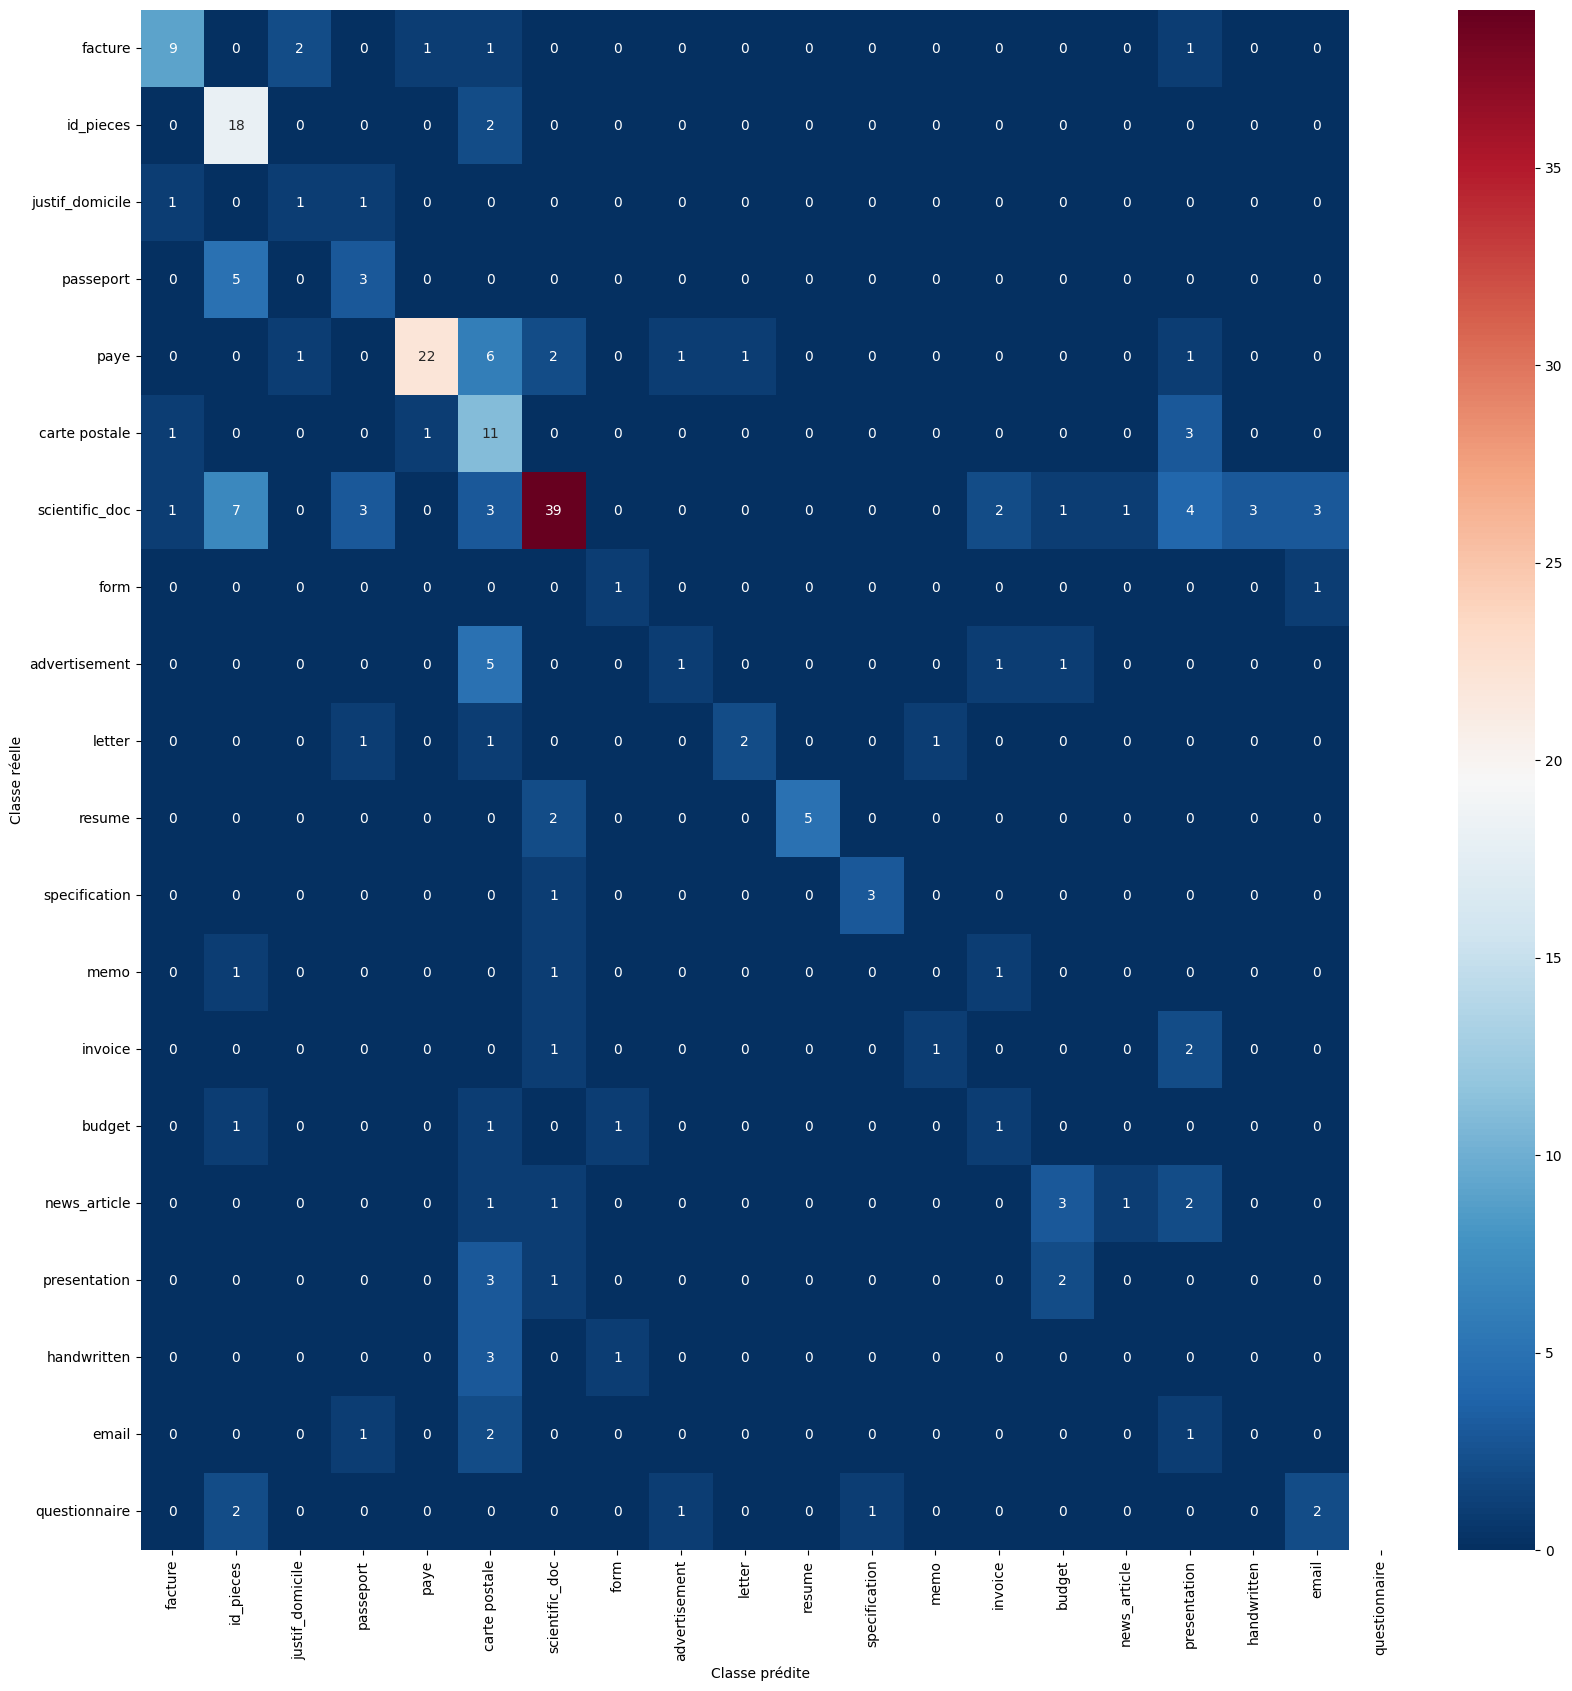

In [33]:
heatmap = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(heatmap, annot = True, cmap = "RdBu_r", xticklabels = df.type.unique().tolist(), yticklabels = df.type.unique().tolist())

In [34]:
score_minkowski = knn.score(X_test, y_test)
print(score_minkowski)

0.5374449339207048


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Le score n'est pas très bon, mais il semble que la lemmatisation effectuée à l'étape précédente augmente les performances. On essaye différents modèles, avec pour but de trouver et d'optimiser le plus performant.

In [35]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Essai 1 - Même paramètres que lors de la classification précédente (max_features = 500)

In [36]:
clf_lr = LogisticRegression(max_iter=2000)
clf_rf = RandomForestClassifier(n_jobs = -1)
clf_svc = SVC()


param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}

param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000], 
                  'min_samples_leaf': [1, 3, 5], 
                  'max_features': ['sqrt', 'log2']}]

param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
                  {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]

In [37]:
gridcvs = {}

for pgrid, clf, name in zip((param_grid_lr,param_grid_rf,param_grid_svc),
                           (clf_lr,clf_rf,clf_svc),
                           ('LogisticRegression', 'RF','SVM')):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit = True)
    gridcvs[name] = gcv

In [38]:
from sklearn.model_selection import StratifiedKFold
outer_cv = StratifiedKFold(n_splits=3, shuffle = True)

outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, X_ro, y_ro, cv = outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')

LogisticRegression: outer accuracy 96.23 +/- 0.46
RF: outer accuracy 96.73 +/- 0.23
SVM: outer accuracy 96.32 +/- 0.45


Le modèle le plus performant est la RF. On cherche à l'optimiser.


In [39]:
from sklearn.metrics import accuracy_score

final_clf = gridcvs['RF']
final_clf.fit(X_ro, y_ro)

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_ro, y_pred=final_clf.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Best Parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}
Training Accuracy: 97.82
Test Accuracy: 74.01


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Essai 2 - Paramètres originaux (pas de max_features)

In [40]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_lr = LogisticRegression(random_state=22, max_iter=2000)
clf_rf = RandomForestClassifier(n_jobs = -1, random_state=22)
clf_svc = SVC(random_state=22)


param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}

param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000, 2500], 
                  'min_samples_leaf': [1, 3, 5], 
                  'max_features': ['sqrt', 'log2']}]

param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
                  {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]

gridcvs = {}

for pgrid, clf, name in zip((param_grid_lr,param_grid_rf,param_grid_svc),
                           (clf_lr,clf_rf,clf_svc),
                           ('LogisticRegression', 'RF','SVM')):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit = True)
    gridcvs[name] = gcv
    
from sklearn.model_selection import StratifiedKFold
outer_cv = StratifiedKFold(n_splits=3, shuffle = True)

outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, X_ro, y_ro, cv = outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')
    
final_clf = gridcvs['RF']
final_clf.fit(X_ro, y_ro)

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_ro, y_pred=final_clf.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

LogisticRegression: outer accuracy 99.10 +/- 0.04
RF: outer accuracy 99.74 +/- 0.11
SVM: outer accuracy 99.68 +/- 0.04
Best Parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 1000}


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy: 100.00
Test Accuracy: 73.57


In [41]:
final_clf = gridcvs['SVM']
final_clf.fit(X_ro, y_ro)

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_ro, y_pred=final_clf.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Best Parameters: {'C': 100.0, 'gamma': 0.002154434690031882, 'kernel': 'rbf'}
Training Accuracy: 100.00
Test Accuracy: 68.28


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


La Random Forest semble mieux s'en sortir. On cherche à confirmer ça dans les essais suivants.

### Essai 3 - Max_features = 5000

In [42]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(ngram_range = (1,3), max_features = 5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_lr = LogisticRegression(random_state=22, max_iter=2000)
clf_rf = RandomForestClassifier(n_jobs = -1, random_state=22)
clf_svc = SVC(random_state=22)


param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}

param_grid_rf = [{'n_estimators': [10, 50, 100, 250, 500, 1000, 2500], 
                  'min_samples_leaf': [1, 3, 5], 
                  'max_features': ['sqrt', 'log2']}]

param_grid_svc = [{'kernel': ['rbf'], 'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 0, 4)},
                  {'kernel': ['linear'], 'C': np.logspace(-4, 4, 9)}]

gridcvs = {}

for pgrid, clf, name in zip((param_grid_lr,param_grid_rf,param_grid_svc),
                           (clf_lr,clf_rf,clf_svc),
                           ('LogisticRegression', 'RF','SVM')):
    gcv = GridSearchCV(clf, pgrid, cv=3, refit = True)
    gridcvs[name] = gcv
    
from sklearn.model_selection import StratifiedKFold
outer_cv = StratifiedKFold(n_splits=3, shuffle = True)

outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, X_ro, y_ro, cv = outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')
    


LogisticRegression: outer accuracy 98.19 +/- 0.15
RF: outer accuracy 98.71 +/- 0.07
SVM: outer accuracy 98.57 +/- 0.27


In [43]:
final_clf = gridcvs['RF']
final_clf.fit(X_ro, y_ro)

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_ro, y_pred=final_clf.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Best Parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 1000}


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy: 99.74
Test Accuracy: 75.33


In [44]:
final_clf = gridcvs['SVM']
final_clf.fit(X_ro, y_ro)

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_ro, y_pred=final_clf.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Best Parameters: {'C': 100.0, 'gamma': 0.046415888336127774, 'kernel': 'rbf'}
Training Accuracy: 99.74
Test Accuracy: 38.77


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Cette fois, sur la RandomForest, on voit que réduire le nombre de features à 5000 a semblé augmenter la précision du modèle !

### Essai 4 - RandomForest only, 10.000 features.

In [45]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(ngram_range = (1,3), max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_rf = RandomForestClassifier(n_jobs = -1, random_state=22)
param_grid_rf = {'n_estimators': [100, 250, 500, 1000, 2500], 'min_samples_leaf': [1], 'max_features': ['log2']}
gridcvs = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf)

gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
pd.DataFrame(a)[['params','mean_test_score','std_test_score']]

train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Training Accuracy: 99.88
Test Accuracy: 74.89


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Passer de 5000 à 10000 features ne semble pas améliorer la performance.

### Test avec la régression logistique.

In [46]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(ngram_range = (1,3), max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_lr = LogisticRegression(n_jobs = -1, C = 3.1622776601683795, solver = 'liblinear', random_state=22)

clf_lr.fit(X_ro, y_ro);

train_acc = accuracy_score(y_true=y_ro, y_pred=clf_lr.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=clf_lr.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


Training Accuracy: 99.82
Test Accuracy: 76.21


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


La régression logistique s'en sort bien, mais reste inférieure à la RandomForest. Cependant, elle tourne beaucoup plus vite, cela peut donc être une possibilité pour éventuellement réduire le temps de calcul. 

### Essai 5 - 20.000 features

In [47]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(ngram_range = (1,3), max_features = 20000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_rf = RandomForestClassifier(n_jobs = -1, random_state=22)
param_grid_rf = {'n_estimators': [100, 250, 500, 1000, 2500], 'min_samples_leaf': [1], 'max_features': ['log2']}
gridcvs = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf)

gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
pd.DataFrame(a)[['params','mean_test_score','std_test_score']].head()

train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy: 99.93
Test Accuracy: 69.60


### Essai 6 - 10.000 features, n_gram = (1,2)

In [48]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(ngram_range = (1,2), max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_rf = RandomForestClassifier(n_jobs = -1, random_state=22)
param_grid_rf = {'n_estimators': [100, 250, 500, 1000, 2500], 'min_samples_leaf': [1], 'max_features': ['log2']}
gridcvs = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf)

gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
pd.DataFrame(a)[['params','mean_test_score','std_test_score']].head()

train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Training Accuracy: 99.81
Test Accuracy: 74.89


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Essai 7 - 10.000 features, n_gram = 1

In [57]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer(max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_rf = RandomForestClassifier(n_jobs = -1, random_state=22)
param_grid_rf = {'n_estimators': [100, 250, 500, 1000, 2500], 'min_samples_leaf': [1], 'max_features': ['log2']}
gridcvs = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf)

gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
pd.DataFrame(a)[['params','mean_test_score','std_test_score']]

train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))



print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy: 100.00
Test Accuracy: 76.65


## Affichage de la matrice de confusion.

Les derniers paramètres semblent optimaux.

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<AxesSubplot:xlabel='Classe prédite', ylabel='Classe réelle'>

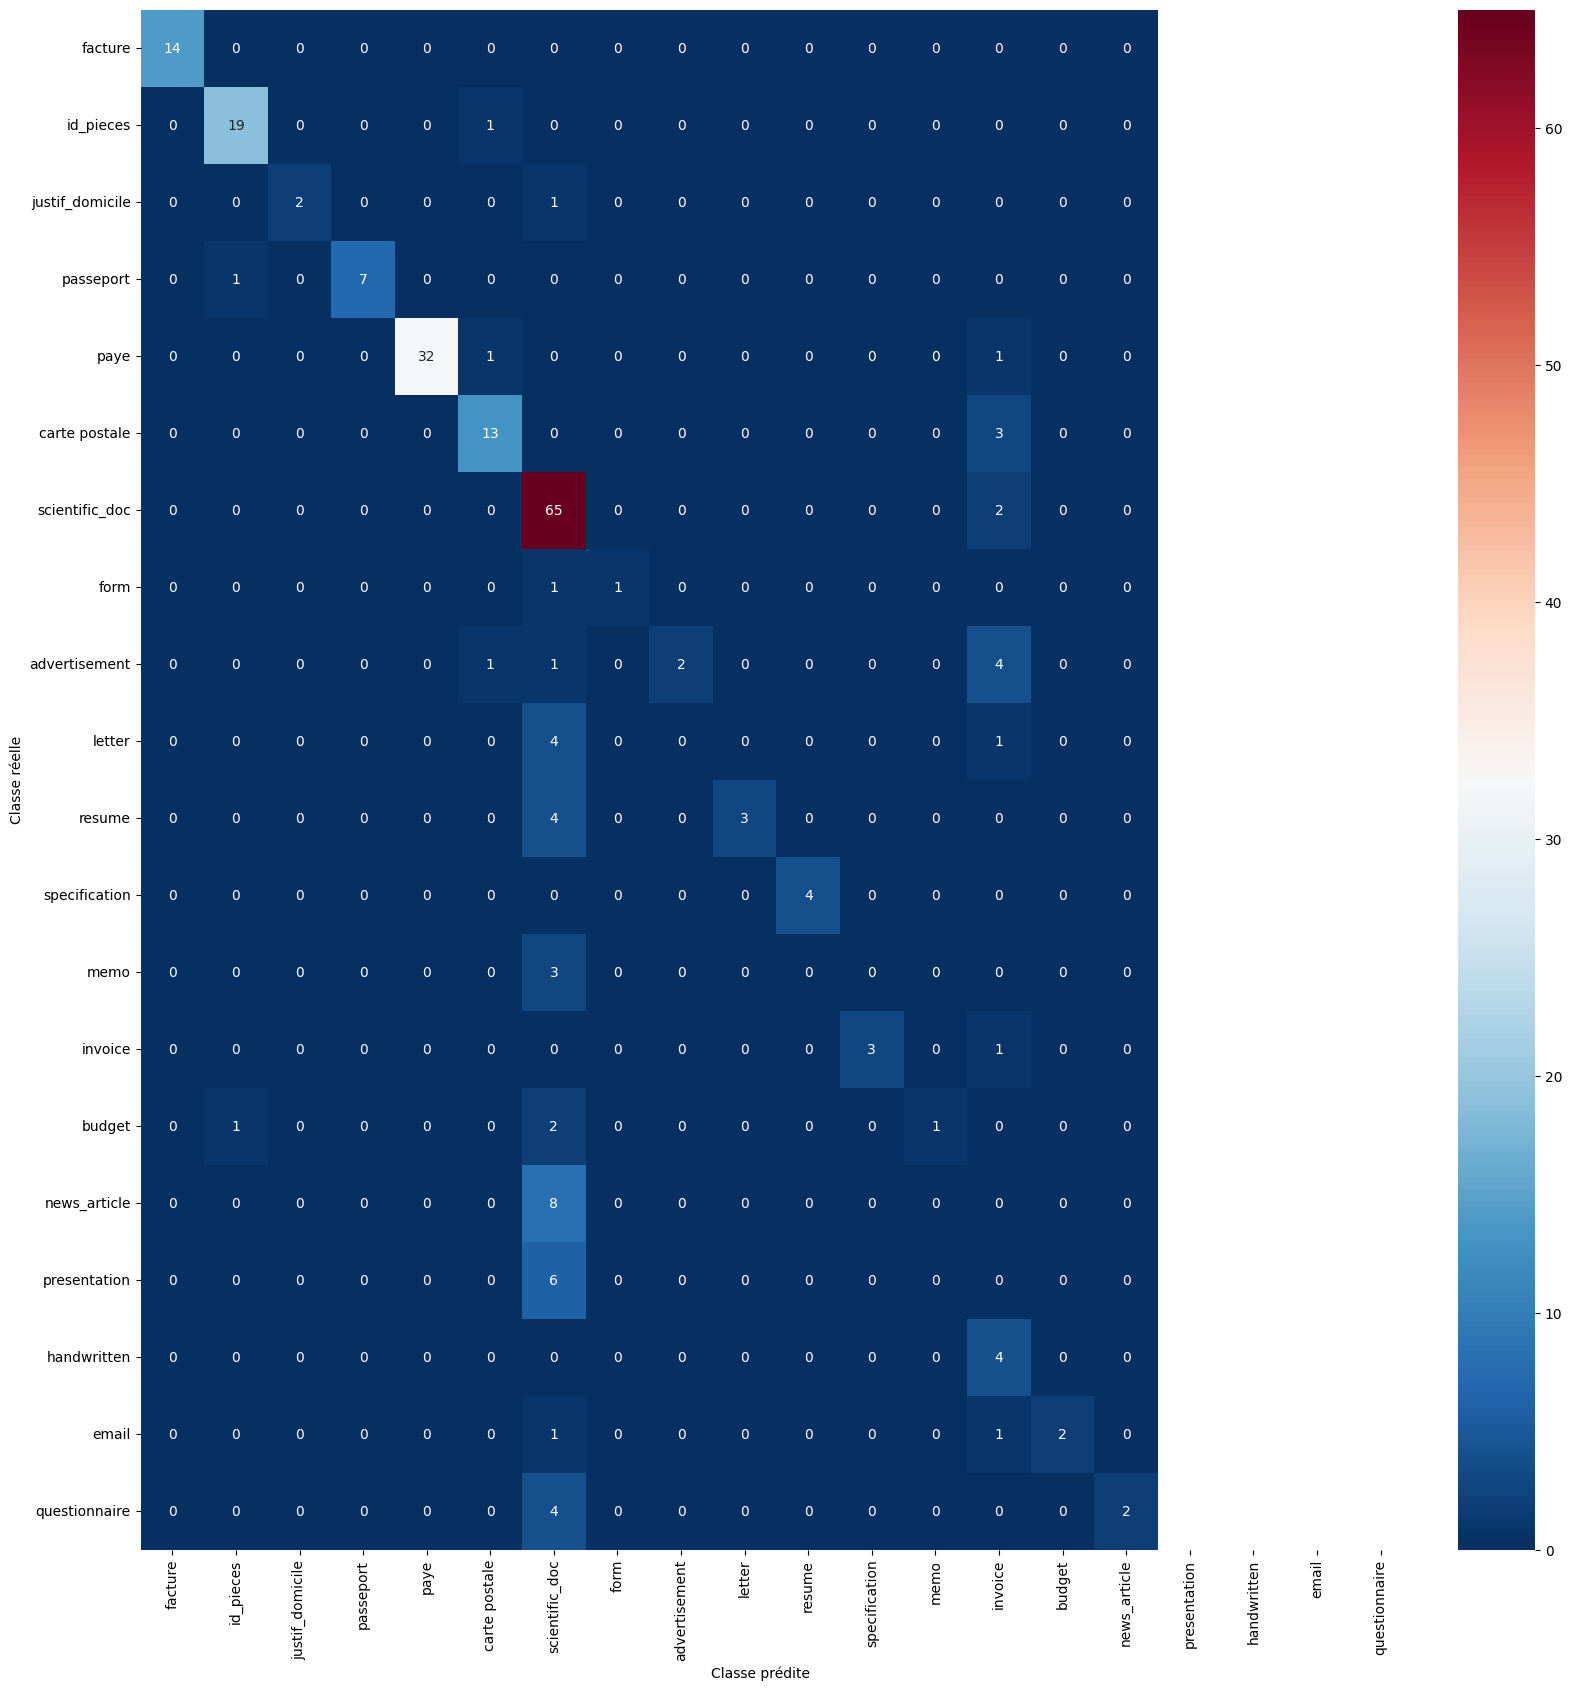

In [59]:
y_pred=gridcvs.predict(X_test)

heatmap = pd.crosstab(y_test, y_pred, rownames = ['Classe réelle'], colnames = ['Classe prédite'])
plt.figure(figsize = (20,20))
sns.heatmap(heatmap, annot = True, cmap = "RdBu_r", xticklabels = df.type.unique().tolist(), yticklabels = df.type.unique().tolist())

Le modèle choisi par validation croisée est relativement performant sur l'échantillon de test.
En particulier, le modèle affecte beaucoup plus de documents à la classe "rrc.cvc" qu'il n'y en a en réalité.

Sur les 67 "vrais" documents scientifiques on en détecte bien 65, mais on y classe également 35 autres documents divers. Quand on regarde le dataset et les wordclouds, cela se comprend : ces documents traitent de sujets très similaires.


In [60]:
print(classification_report(y_test, y_pred, target_names = df.type.unique().tolist()))

                 precision    recall  f1-score   support

        facture       1.00      1.00      1.00        14
      id_pieces       0.90      0.95      0.93        20
justif_domicile       1.00      0.67      0.80         3
      passeport       1.00      0.88      0.93         8
           paye       1.00      0.94      0.97        34
  carte postale       0.81      0.81      0.81        16
 scientific_doc       0.65      0.97      0.78        67
           form       1.00      0.50      0.67         2
  advertisement       1.00      0.25      0.40         8
         letter       0.00      0.00      0.00         5
         resume       1.00      0.43      0.60         7
  specification       1.00      1.00      1.00         4
           memo       0.00      0.00      0.00         3
        invoice       1.00      0.75      0.86         4
         budget       1.00      0.25      0.40         4
   news_article       0.00      0.00      0.00         8
   presentation       0.00    

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Itération 4 - essais additionnels

### Essai avec un TF-IDF.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = TfidfVectorizer(max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_rf = RandomForestClassifier(n_jobs = -1, random_state=22)
param_grid_rf = {'n_estimators': [100, 250, 500, 1000, 2500], 'min_samples_leaf': [1], 'max_features': ['log2']}
gridcvs = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf)

gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
pd.DataFrame(a)[['params','mean_test_score','std_test_score']]

train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Training Accuracy: 100.00
Test Accuracy: 75.33


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Pas d'amélioration notable.

### Essai TF-IDF + Logreg

In [102]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = TfidfVectorizer(max_features = 5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

ro = over_sampling.RandomOverSampler(random_state = 20)
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_lr = LogisticRegression(random_state=42, max_iter=2000)

param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
gridcvs = GridSearchCV(estimator = clf_lr, param_grid = param_grid_lr)
gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Training Accuracy: 99.89
Test Accuracy: 78.85


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


On obtient le meilleur score encore jamais obtenu.

In [103]:
gridcvs.best_params_

{'C': 100.0, 'solver': 'lbfgs'}

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<AxesSubplot:xlabel='Classe prédite', ylabel='Classe réelle'>

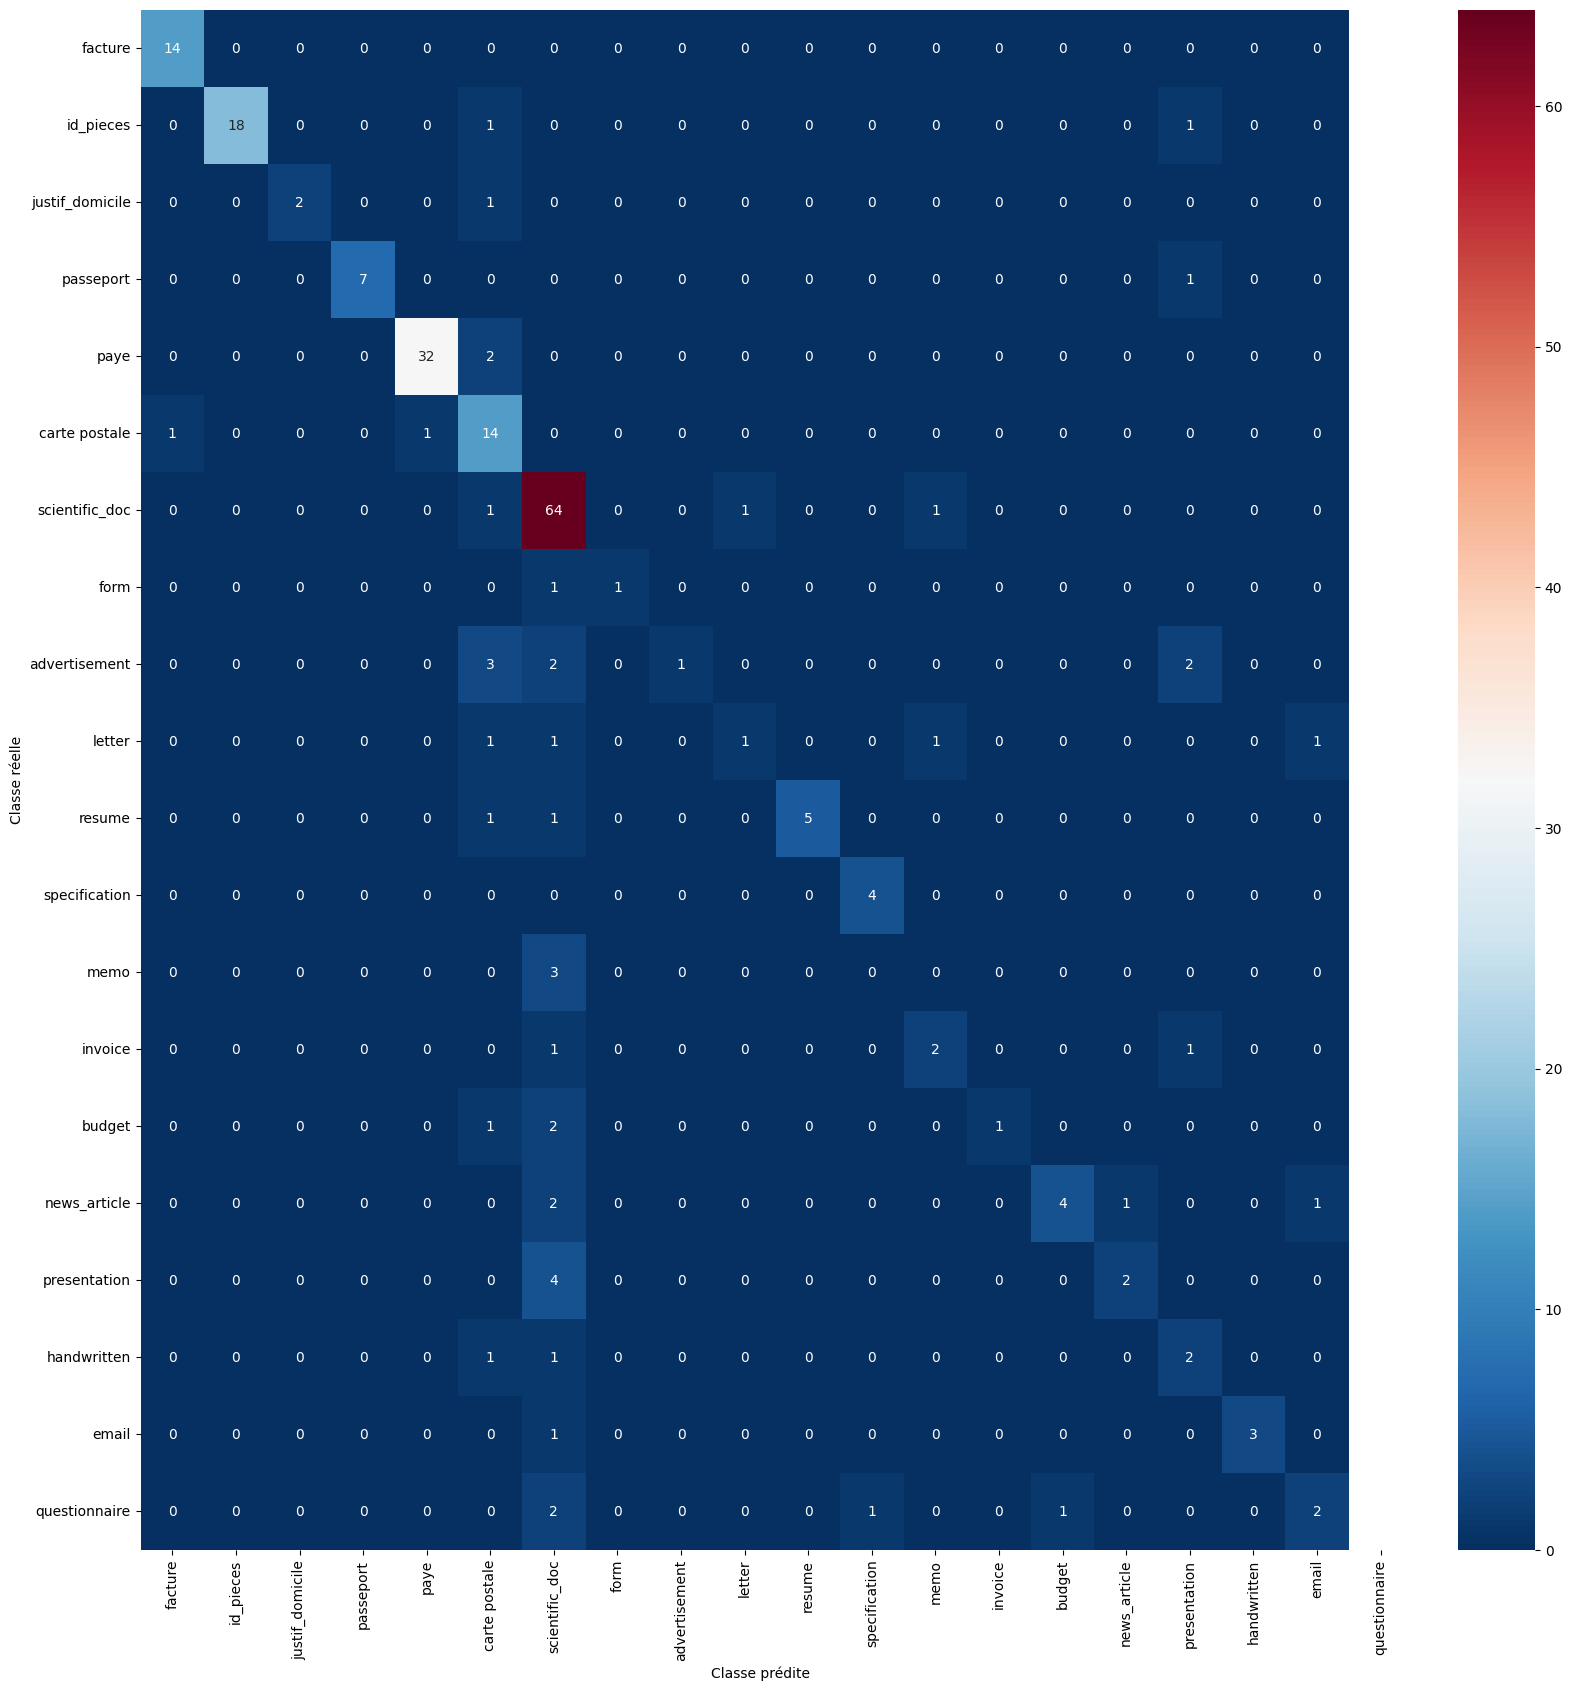

In [104]:
y_pred=gridcvs.predict(X_test)

heatmap = pd.crosstab(y_test, y_pred, rownames = ['Classe réelle'], colnames = ['Classe prédite'])
plt.figure(figsize = (20,20))
sns.heatmap(heatmap, annot = True, cmap = "RdBu_r", xticklabels = df.type.unique().tolist(), yticklabels = df.type.unique().tolist())

In [105]:
print(classification_report(y_test, y_pred, target_names = df.type.unique().tolist()))

                 precision    recall  f1-score   support

        facture       0.93      1.00      0.97        14
      id_pieces       1.00      0.90      0.95        20
justif_domicile       1.00      0.67      0.80         3
      passeport       1.00      0.88      0.93         8
           paye       0.97      0.94      0.96        34
  carte postale       0.54      0.88      0.67        16
 scientific_doc       0.75      0.96      0.84        67
           form       1.00      0.50      0.67         2
  advertisement       1.00      0.12      0.22         8
         letter       0.50      0.20      0.29         5
         resume       1.00      0.71      0.83         7
  specification       0.80      1.00      0.89         4
           memo       0.00      0.00      0.00         3
        invoice       0.50      0.50      0.50         4
         budget       1.00      0.25      0.40         4
   news_article       0.80      0.50      0.62         8
   presentation       0.67    

C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Essais avec TF-IDF + Logreg + RandomUnderSampler

In [81]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

from imblearn.under_sampling import RandomUnderSampler

ro = RandomUnderSampler()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_lr = LogisticRegression(random_state=22, max_iter=2000)

param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
gridcvs = GridSearchCV(estimator = clf_lr, param_grid = param_grid_lr)
gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Training Accuracy: 99.67
Test Accuracy: 63.44


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Essais avec TF-IDF - Logreg - SMOTE

In [82]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

from imblearn.over_sampling import SMOTE

ro = SMOTE()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_lr = LogisticRegression(random_state=22, max_iter=2000)

param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
gridcvs = GridSearchCV(estimator = clf_lr, param_grid = param_grid_lr)
gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Training Accuracy: 99.93
Test Accuracy: 77.53


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Pas de différence notable avec l'over_sampler classique.

### Test TF-IDF + Logreg + ClusterCentroids

In [83]:
X = df.mots_doctr_trad
y = df.type_num

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = 10000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test).todense()

from imblearn.under_sampling import ClusterCentroids

ro = ClusterCentroids()
X_ro, y_ro = ro.fit_resample(X_train, y_train)

clf_lr = LogisticRegression(random_state=22, max_iter=2000)

param_grid_lr = {'solver': ['liblinear', 'lbfgs'], 'C': np.logspace(-4, 2, 9)}
gridcvs = GridSearchCV(estimator = clf_lr, param_grid = param_grid_lr)
gridcvs.fit(X_ro, y_ro);
a = gridcvs.cv_results_
train_acc = accuracy_score(y_true=y_ro, y_pred=gridcvs.predict(X_ro))
test_acc = accuracy_score(y_true=y_test, y_pred=gridcvs.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Training Accuracy: 99.00
Test Accuracy: 58.15


C:\Users\alexj\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [90]:
df.to_csv('data_vectorized_2709_doctr_trad', sep = '\t', index = False)